# **Data analysis with Scikit-Learn**:)






# Libraries instaliavimas

In [ ]:
#Pagrindiniu paketu importavimas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
#papildomai
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
diabetes = r'/content/drive/MyDrive/diabetes.csv'
import csv
open(diabetes)

<_io.TextIOWrapper name='/content/drive/MyDrive/diabetes.csv' mode='r' encoding='UTF-8'>

In [ ]:
df = pd.read_csv(diabetes)

In [ ]:
#eiluciu ir stulpeliu skaicius
df.shape

(768, 9)

In [ ]:
## informacija apie stulpelius
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [ ]:
## kokios stulpeliu reiksmes, nuo to priklausomai zinome ar juos reikia tvarkyti ar galima is karto dirbti
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#ar yra nuliniu reiksmiu
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df2 = df[df.Glucose.notna()]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


**Diabeto rodikliai pagal glukozę**
**Fasting Blood Sugar Test.**
Šitas testas matuoja cukrų(glukozę) kraujyje po naktinio pasninko (an overnight fast).
*   Cukraus kiekis kraujyje nevalgius 99 mg/dl arba mažesnis yra normalus
*   Nuo 100 iki 125 mg/dl rodo, kad sergate prediabetu
*   126 mg/dl ar daugiau rodo, kad sergate cukriniu diabetu



Reference:
  https://www.cdc.gov/diabetes/basics/getting-tested.html

In [ ]:
diabetes_class = []
for i in df2.Glucose:
  if float(i) > 126:
    diabetes_class.append("diabetes")
  elif float(i) < 99:
    diabetes_class.append("normal")
  else:
    diabetes_class.append("prediabetes")

Faktoriai, kurie didina tikimybę susirgti Diabetu:

*   Prediabetas;
*   Antsvoris;
*   Amžius (virš 45 metų)
*   Fizinis aktyvumas mažesnis nei 3 kartus per savaitę;
*   Yra afroamerikietis, ispanas arba lotynų kilmės, Amerikos indėnas arba Aliaskos gimtoji šalis. Kai kuriems Ramiojo vandenyno salų gyventojams ir Azijos amerikiečiams taip pat gresia didesnė rizika;
*   Turėkite vieną iš tėvų, brolį ar seserį, sergantį 2 tipo cukriniu diabetu.


Glukozė, BMI( Body Mass Index), Amžius

Reference: https://www.cdc.gov/diabetes/basics/risk-factors.html




In [ ]:
selection = ['Glucose','BMI', 'Age']
df3 = df2[selection]
df3

,Glucose,BMI,Age
0,148,33.60,50
1,85,26.60,31
2,183,23.30,32
3,89,28.10,21
4,137,43.10,33
...,...,...,...
763,101,32.90,63
764,122,36.80,27
765,121,26.20,30
766,126,30.10,47


In [ ]:
diabetes_class = pd.Series(diabetes_class, name='diabetes')
df4 = pd.concat([df3, diabetes_class], axis=1)
df4

,Glucose,BMI,Age,diabetes
0,148,33.60,50,diabetes
1,85,26.60,31,normal
2,183,23.30,32,diabetes
3,89,28.10,21,normal
4,137,43.10,33,diabetes
...,...,...,...,...
763,101,32.90,63,prediabetes
764,122,36.80,27,prediabetes
765,121,26.20,30,prediabetes
766,126,30.10,47,prediabetes


In [ ]:
df4.to_csv('diabetes_data_preprocessed.csv', index=False)

In [ ]:
! ls -l

total 48
-rw-r--r-- 1 root root 16480 Nov 30 11:40 diabetes_data_preprocessed.csv
drwx------ 5 root root  4096 Nov 30 11:40 drive
-rw-r--r-- 1 root root 16618 Nov 30 08:04 plot_diabetes_class.pdf
drwxr-xr-x 1 root root  4096 Nov 22 00:14 sample_data


# **Data Visualation**

Body Mass Index (BMI) rodikliai:

*   =< 18,5 underweight (per mažas svoris)
*   18,5 - 24,9 normalus
*   25 - 29,9 overweight (yra viršsvoris)
*   => 30 obesity (nutukimas)



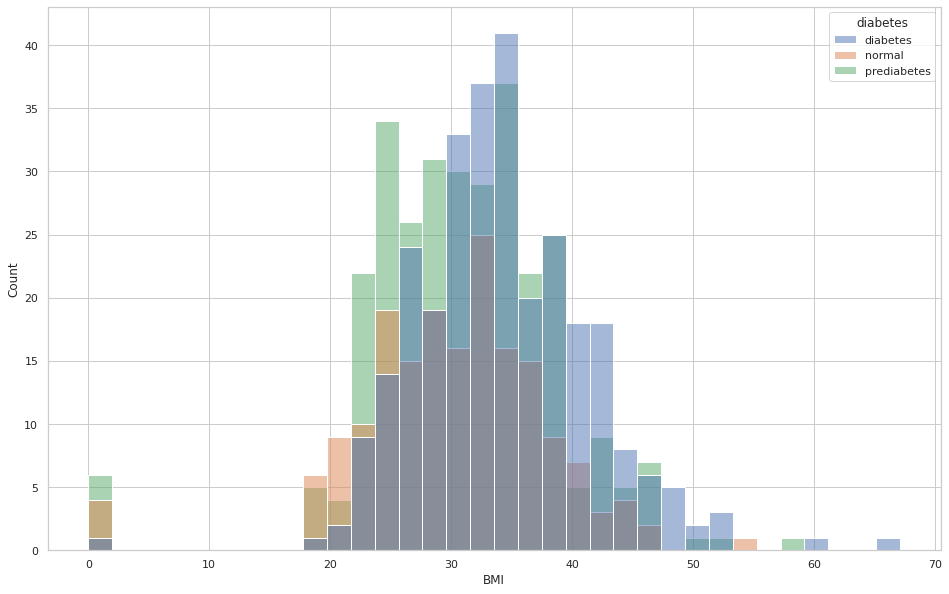

In [ ]:
plt.figure(figsize=(16, 10))
sns.histplot(hue='diabetes', x='BMI', data=df4)

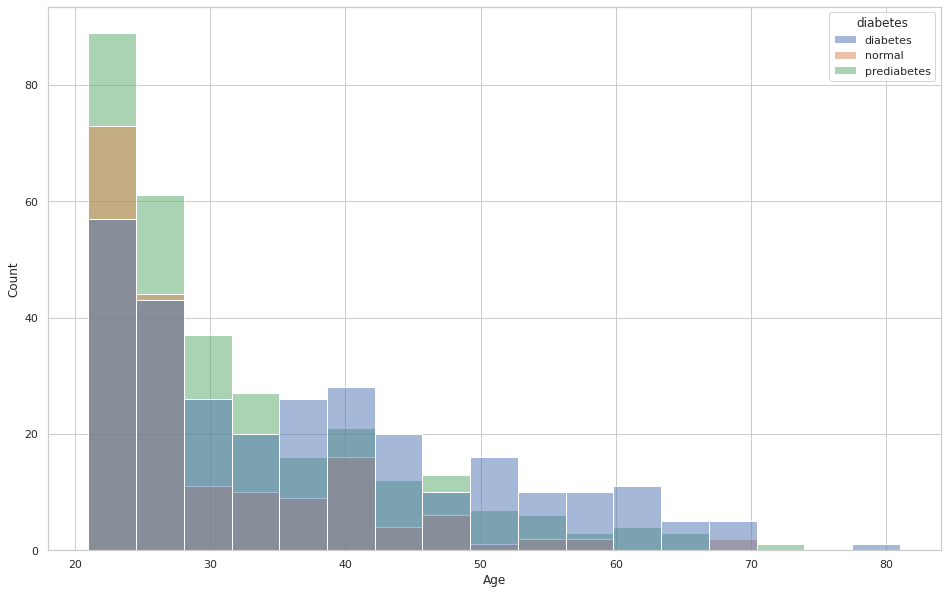

In [ ]:
plt.figure(figsize=(16, 10))
sns.histplot(hue='diabetes', x='Age', data=df4)

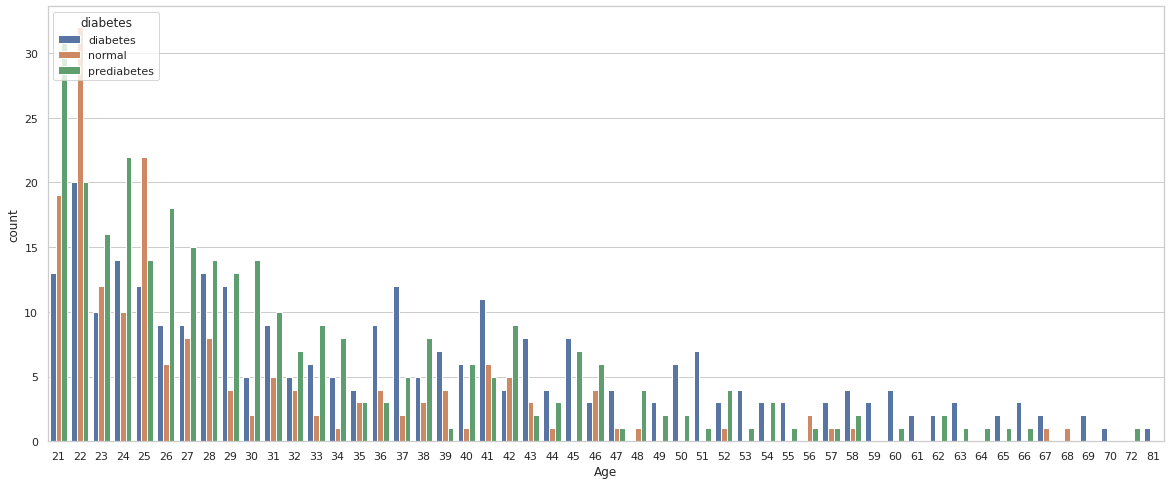

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(hue='diabetes', x='Age', data=df4)

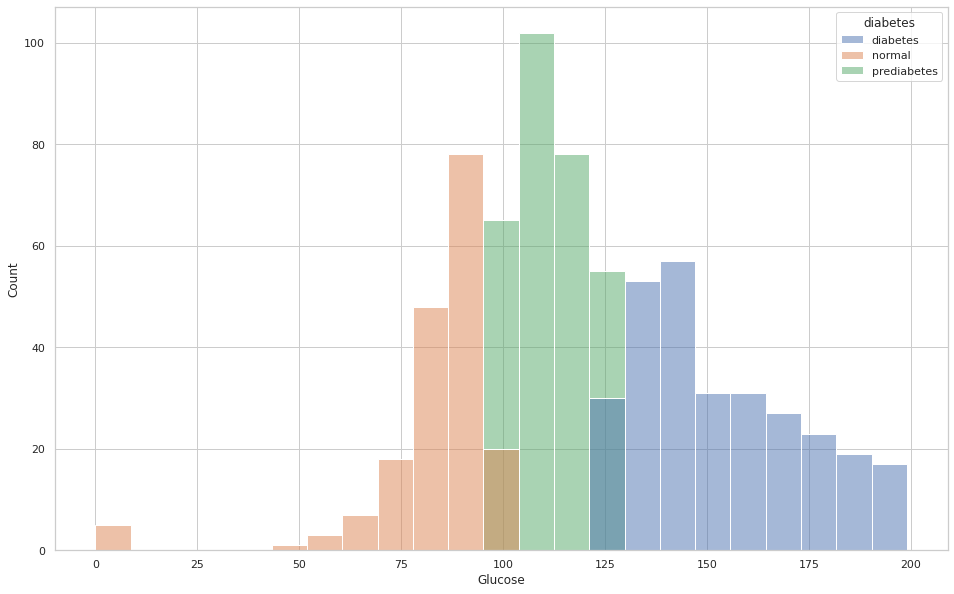

In [ ]:
plt.figure(figsize=(16, 10))
sns.histplot(hue='diabetes', x='Glucose', data=df4)

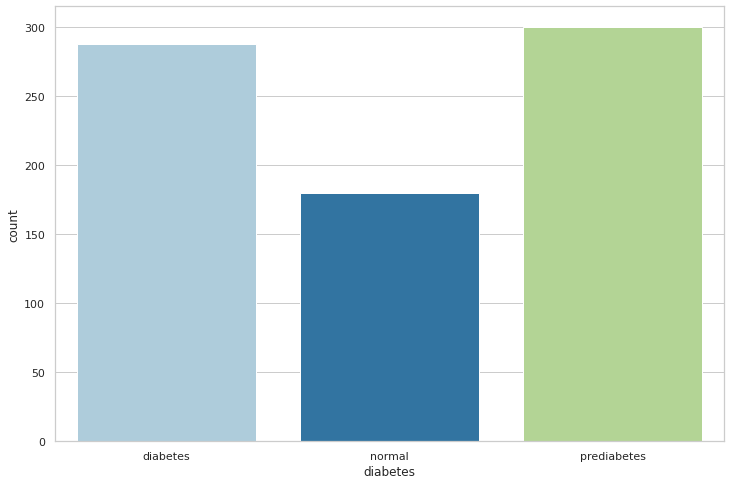

In [ ]:
sns.set_palette("Paired")
plt.figure(figsize=(12,8))
sns.countplot(data=df4, x=df4.iloc[:,3])

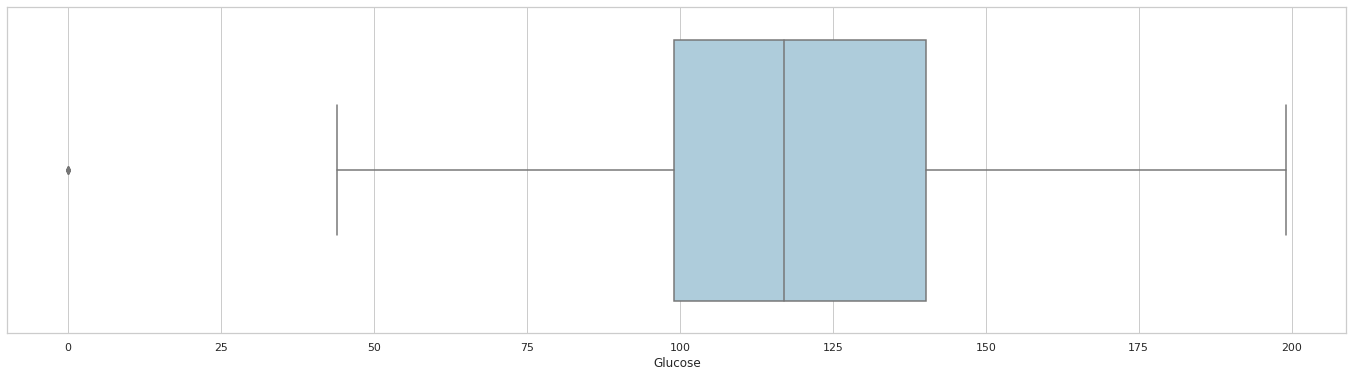

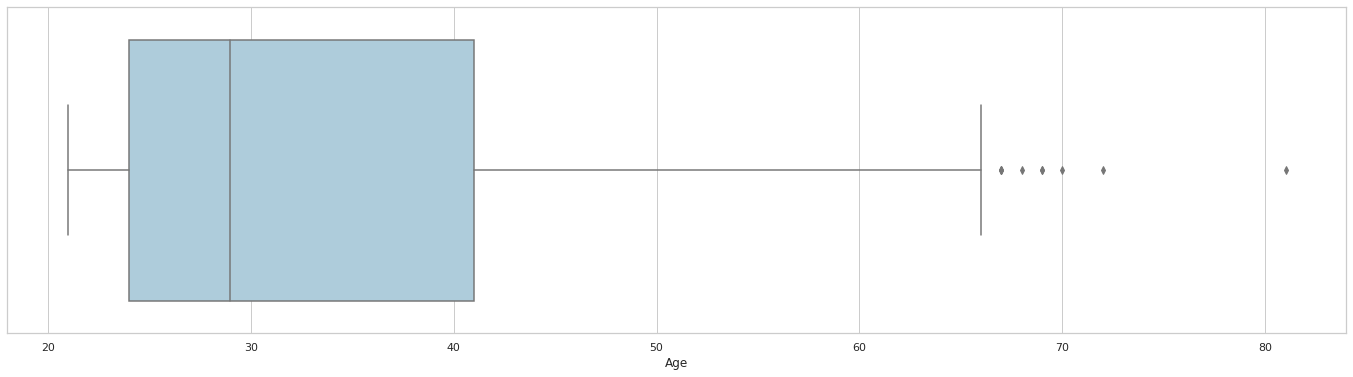

In [ ]:
for col in df4.select_dtypes(include ='int'):
    plt.figure(figsize=(24,6))
    sns.boxplot(x=col,  data=df4)

<Figure size 1440x720 with 0 Axes>

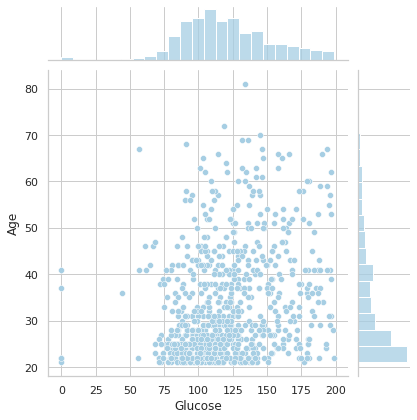

In [ ]:
plt.figure(figsize=(20,10))
sns.jointplot(x='Glucose', y='Age', data=df4)

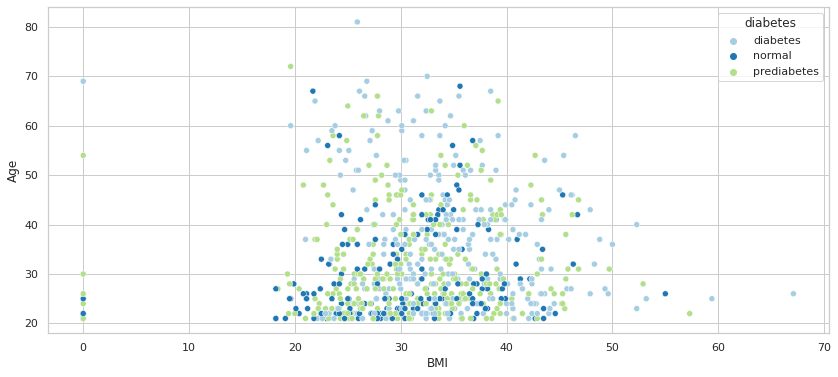

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df4, x=df4['BMI'], y=df4['Age'], palette="Paired", hue = df4['diabetes'])

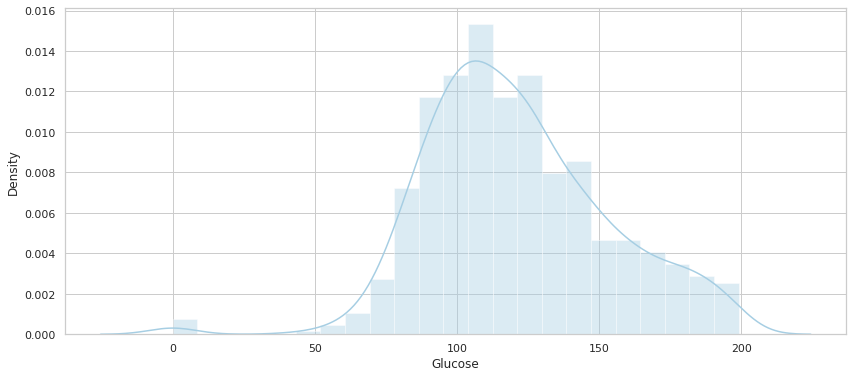

In [ ]:
plt.figure(figsize=(14,6))
sns.distplot(df4['Glucose'])

# **Atskirti data i modelius ir palyginti ML algoritmus**

In [ ]:
#atskirti dataset as response variable and feature variabes
X = df4.drop('diabetes', axis = 1)
y = df4['diabetes']

In [ ]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

((614, 3), (614,))

In [ ]:
X_test.shape, y_test.shape

((154, 3), (154,))

In [ ]:
# Sukuriam lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:15<00:00,  2.64it/s]


[11:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:08<00:00,  4.73it/s]

[11:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
##Treniruočių rinkinio našumo lentelė (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.99,0.99,3.20,0.03
ExtraTreeRegressor,0.99,0.99,3.20,0.03
ExtraTreesRegressor,0.99,0.99,3.20,0.54
RandomForestRegressor,0.95,0.95,7.14,0.26
BaggingRegressor,0.94,0.94,7.83,0.09
GaussianProcessRegressor,0.88,0.88,11.16,0.19
HistGradientBoostingRegressor,0.87,0.87,11.64,1.72
LGBMRegressor,0.86,0.86,11.80,0.06
GradientBoostingRegressor,0.83,0.83,13.21,0.23


In [ ]:
# Performance table of the test - našumo lentelė
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoCV,0.83,0.84,12.77,0.07
LassoLarsCV,0.83,0.84,12.78,0.03
Lars,0.83,0.84,12.78,0.04
LassoLarsIC,0.83,0.84,12.78,0.02
LarsCV,0.83,0.84,12.78,0.05
LinearRegression,0.83,0.84,12.78,0.02
TransformedTargetRegressor,0.83,0.84,12.78,0.02
OrthogonalMatchingPursuitCV,0.83,0.84,12.78,0.04
RidgeCV,0.83,0.84,12.78,0.02


[(0.0, 1.0)]

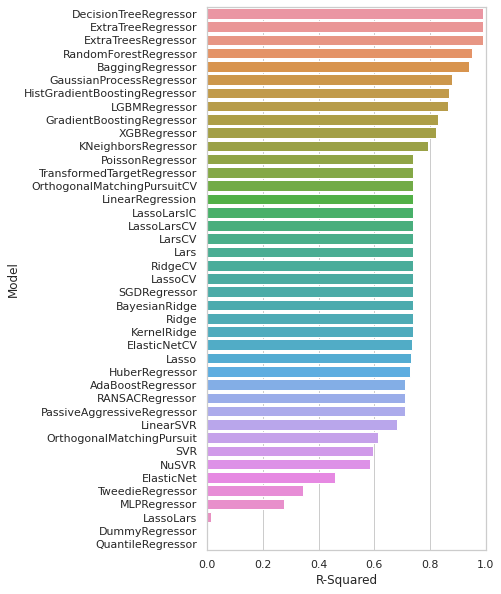

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

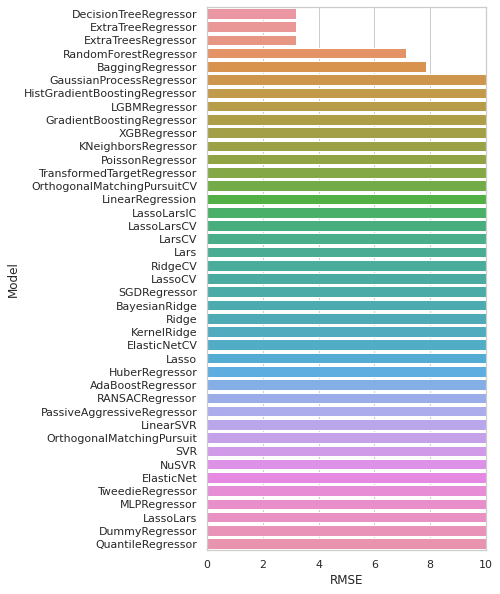

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

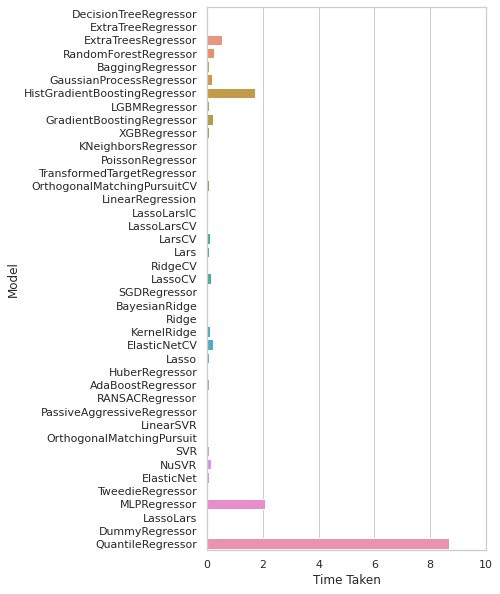

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))